# Analysis of Rental Bike Sharing in Washington, DC


In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
#read csv dataset

df = pd.read_csv(r"C:\Users\suren\Documents\Datasets-Projects\bike sharing data\day.csv")

## Dataset

The bike sharing dataset was sourced from UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

The core dataset is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data.

<b>Characteristics

instant: record index<br> 
dteday : date<br> 
season : season (1: spring, 2: summer, 3: fall, 4: winter)<br> 
yr : year (0: 2011, 1: 2012)<br> 
mnth : month (1 to 12)<br> 
holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)<br> 
weekday : day of the week<br> 
workingday : if day is neither weekend nor holiday the value is 1, otherwise it is 0.<br> 
weathersit : <br> 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br> 
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> 
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br> 
temp : Normalized temperature in Celsius. The values are divided to 41 (max)<br> 
atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)<br> 
hum: Normalized humidity. The values are divided to 100 (max)<br> 
windspeed: Normalized wind speed. The values are divided to 67 (max)<br> 
casual: count of casual users<br> 
registered: count of registered users<br> 
cnt: count of total rental bikes including both casual and registered<br> 



## Exploratory Data Analysis

In [3]:
#find the structure of the dataset

df.shape

(731, 16)

The dataset contains 731 rows and 16 columns.

In [4]:
#first five rows of data

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#check the data type of each column

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

All of the columns are of either int64 or float64 data type except for dteday.

In [6]:
#basic summary statistics of the dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The average number of bikes rented was **4,504**. <br>
The median number of bikes rented was **4,548**.

In [7]:
#check for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing/null values in this dataset.

In [8]:
#converting dteday column to datetime data type

df['dteday']=pd.to_datetime(df['dteday'], format='%Y/%m/%d')

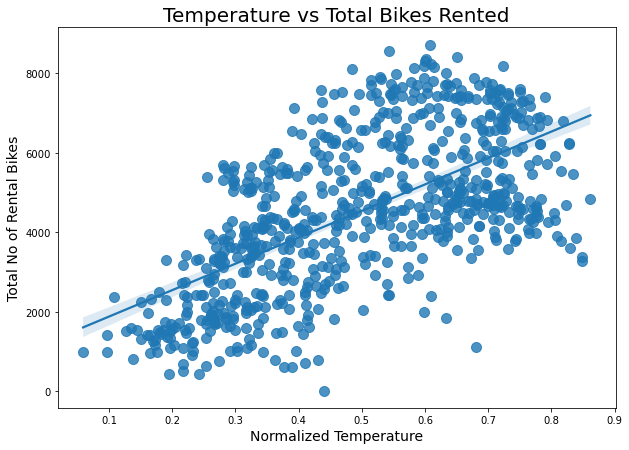

In [9]:
#scatter plot for temp vs count

plt.figure(figsize=(10,7))
sns.regplot(data=df, x='temp', y='cnt', scatter_kws={'s': 100})

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Normalized Temperature', fontsize=14)
plt.title('Temperature vs Total Bikes Rented', fontsize=20)

plt.show()

The above plot suggests that temperature is positively correlated with the number of bikes rented.

In [10]:
#using corr() method to find the other features that are correlated to count
df.corr()['cnt'].sort_values()

weathersit   -0.297391
windspeed    -0.234545
hum          -0.100659
holiday      -0.068348
workingday    0.061156
weekday       0.067443
mnth          0.279977
season        0.406100
yr            0.566710
temp          0.627494
instant       0.628830
atemp         0.631066
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

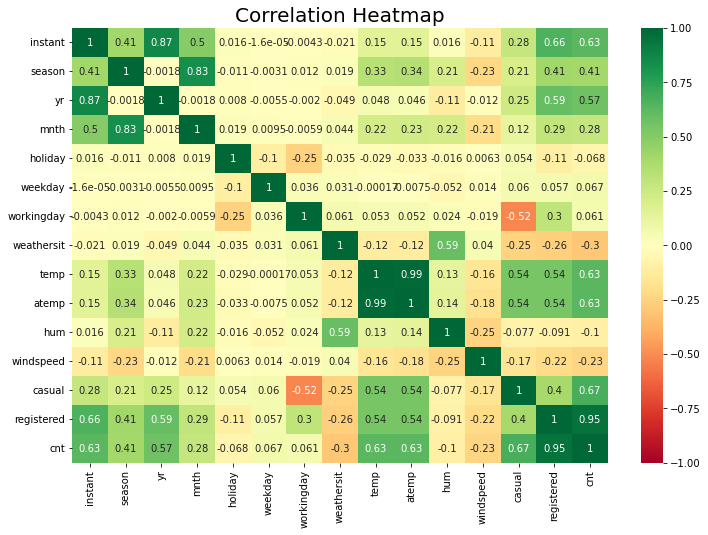

In [11]:
#Correlation heatmap for all variables

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True, vmin=-1, fmt='.2g')

plt.title("Correlation Heatmap", fontsize=20)
plt.show()

The count of bikes rented is positively correlated to 'temp', 'atemp', and negatively correlated to 'windspeed', 'weathersit' (weather condition), and 'hum'.

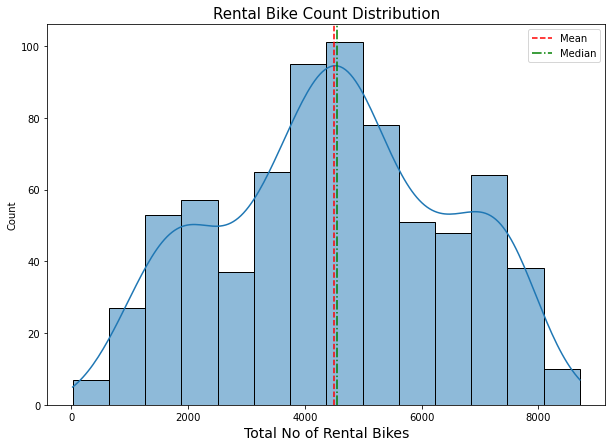

In [12]:
#Distribution of count

plt.figure(figsize=(10,7))

sns.histplot(data=df, x='cnt', kde=True)

#calculate mean of count

count_mean = df['cnt'].mean()
count_median = df['cnt'].median()

plt.xlabel('Total No of Rental Bikes', fontsize=14)
plt.axvline(x=count_mean, color='red', linestyle='--', label= 'Mean')
plt.axvline(x=count_median, color='green', linestyle ='-.', label='Median')
plt.title('Rental Bike Count Distribution', fontsize=15)
plt.legend()

plt.show()

The resulting distribution is close to a normal distribution although not a perfect bell curve, with the average and median values being almost equal. 

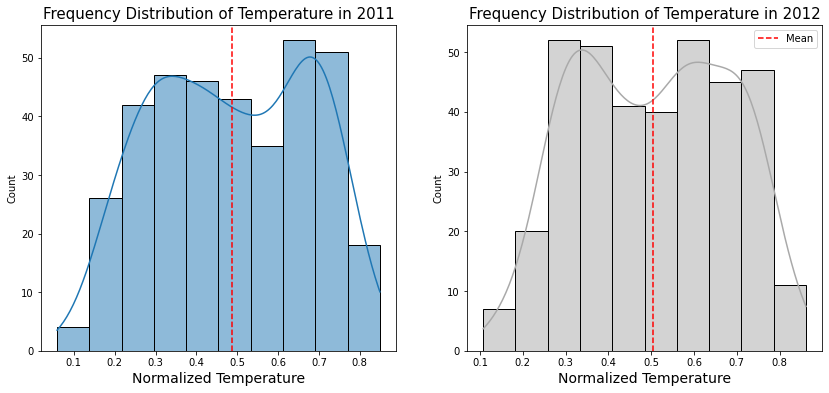

In [13]:
#Distribution of temperature in 2011 and 2012

df2011 = df[df['yr']==0]

df2012 = df[df['yr']==1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df2011, x='temp', ax=axes[0], kde=True)
sns.histplot(data=df2012, x='temp', ax=axes[1], kde=True, color='darkgrey')

axes[0].set_title("Frequency Distribution of Temperature in 2011", fontsize=15)
axes[0].set_xlabel("Normalized Temperature", fontsize=14)
axes[0].axvline(x=df2011['temp'].mean(), color='red', linestyle='--', label= 'Mean')


axes[1].set_title("Frequency Distribution of Temperature in 2012", fontsize=15)
axes[1].set_xlabel("Normalized Temperature", fontsize=14)
axes[1].axvline(x=df2012['temp'].mean(), color='red', linestyle='--', label= 'Mean')

plt.legend()

plt.show()

The distribution of temperature for both 2011 and 2012 represents a bimodal distribution.

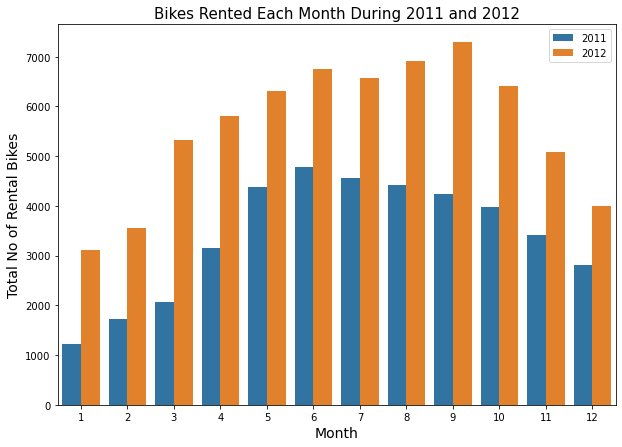

In [14]:
#Bar plot to visualize total number of bikes rented each month in 2011 and 2012

plt.figure(figsize=(10,7))
sns.barplot(data =df, x='mnth', y='cnt', hue='yr', ci=None)


plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title('Bikes Rented Each Month During 2011 and 2012', fontsize=15)
plt.legend(labels=['2011','2012'])

plt.show()

The above plot clearly indicates that the usage of rental bikes increased in each month in 2012 when compared to 2011. It can also be noted that for both years, the numbers are low in the first two months when compared to others.

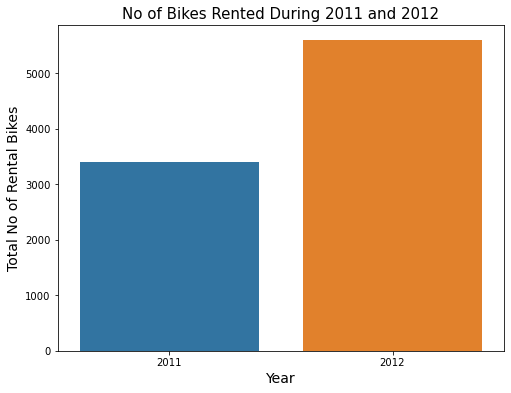

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

In [15]:
#No of bikes rented in 2011 and 2012

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='yr', y='cnt', ci=None)

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('No of Bikes Rented During 2011 and 2012', fontsize=15)
plt.xticks(ticks=range(len('yr')), labels=['2011', '2012'])

plt.show()

df.groupby('yr')['cnt'].sum()

The number of bikes rented has increased by about **65%** from  2011 to 2012.

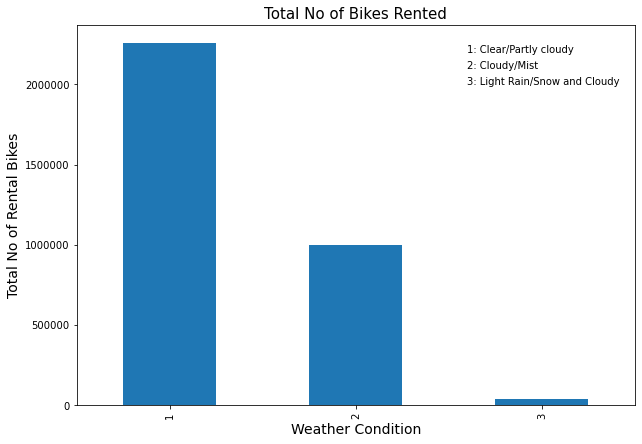

In [16]:
#number of bikes rented and weather condition

plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain')

wea_df = df.groupby('weathersit')['cnt'].sum().plot(kind='bar')

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Weather Condition', fontsize=14)
plt.title('Total No of Bikes Rented', fontsize=15)
plt.text(1.6, 2200000, '1: Clear/Partly cloudy')
plt.text(1.6, 2100000, '2: Cloudy/Mist')
plt.text(1.6, 2000000, '3: Light Rain/Snow and Cloudy')

plt.show()

A large number of bikes were rented when the conditions wear clear compared to cloudy, and rainy days.

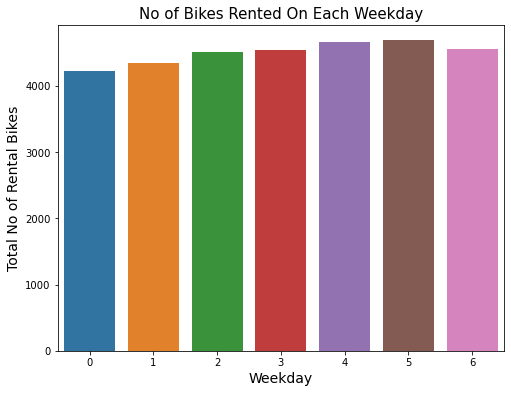

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [17]:
#Bikes rented on each weekday

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='weekday', y='cnt', ci=None)

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Weekday', fontsize=14)
plt.title('No of Bikes Rented On Each Weekday', fontsize=15)

plt.show()

df.groupby('weekday')['cnt'].sum()

Weekday starts with 0: Sunday, and ends with 6: Saturday.
The least number of bikes were rented on **Sunday (444,027)**, and the highest was **Friday (487,790)**.

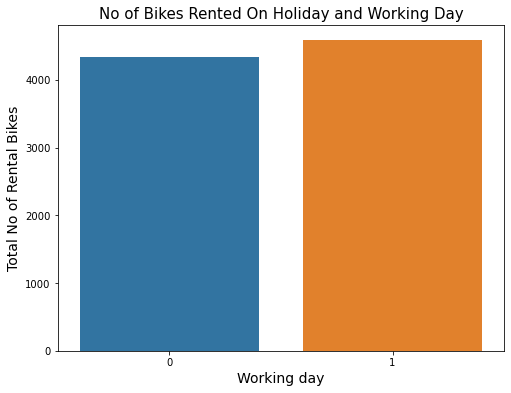

In [18]:
#Bikes rented on work/nonworking days

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='workingday', y='cnt', ci=None)

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Working day', fontsize=14)
plt.title('No of Bikes Rented On Holiday and Working Day', fontsize=15)

plt.show()


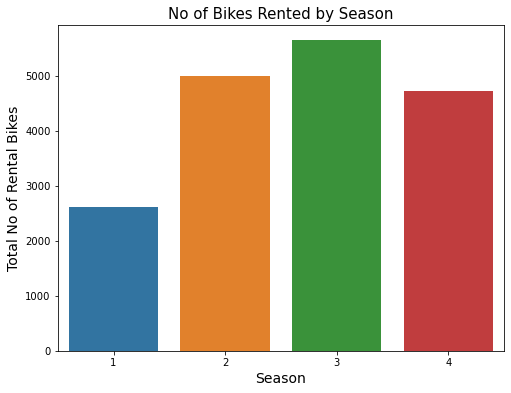

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [36]:
#Box plot by season
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='season', y='cnt', ci=None)

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.title('No of Bikes Rented by Season', fontsize=15)

plt.show()

df.groupby('season')['cnt'].sum()

Fall has the highest demand for bikes followed by Summer, Winter, and Spring.

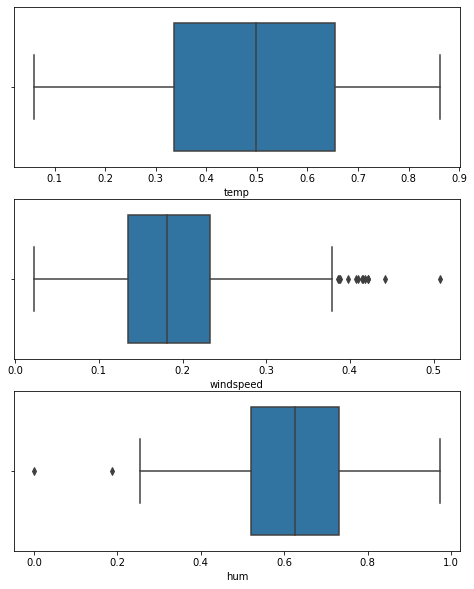

In [19]:
#boxplots for temperature, windspeed, and humidity

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

sns.boxplot(data=df, x='temp', ax=axes[0])
sns.boxplot(data=df, x='windspeed', ax=axes[1])
sns.boxplot(data=df, x='hum', ax=axes[2])

plt.show()

## Linear Regression

Since the feature **'temp'** is highly correlated to **'cnt'** among other features, let's proceed to build a simple linear regression model with **'temp'**.

**Null hypothesis:** No relation exists between the temperature and number of bikes rented in a day.<br>
**Alternate hypothesis:** There exists a relation between the temperature and number of bikes rented in a day.

In [20]:
#assign variables

x = df['temp']
y= df['cnt']

In [21]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 100)

75% of the dataset has been partitioned for trainning and 25% for testing.

In [22]:
#first five rows of training data
x_train.head()

311    0.408333
523    0.602500
381    0.373043
413    0.346667
253    0.653333
Name: temp, dtype: float64

In [23]:
#first five rows of training data
y_train.head()

311    4205
523    7494
381    2935
413    4318
253    5046
Name: cnt, dtype: int64

In [24]:
#add constant

x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, x_train_sm).fit()

C:\Users\suren\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
#print the results summary with alpha = .05

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     378.7
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.84e-64
Time:                        17:41:54   Log-Likelihood:                -4786.0
No. Observations:                 548   AIC:                             9576.
Df Residuals:                     546   BIC:                             9585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1111.9451    184.223      6.036      0.0

From the results above, the null hypothesis can be rejected with 95% confidence level since the p-value for temp: 0.000 is less than 0.05. There's a statistically significant relation between the temperatue and the number of bikes rented in a day.

The coefficient for 'temp' is **6883.3155** and R-squared value **0.41** suggests **41%** of the variation is explained by this model.

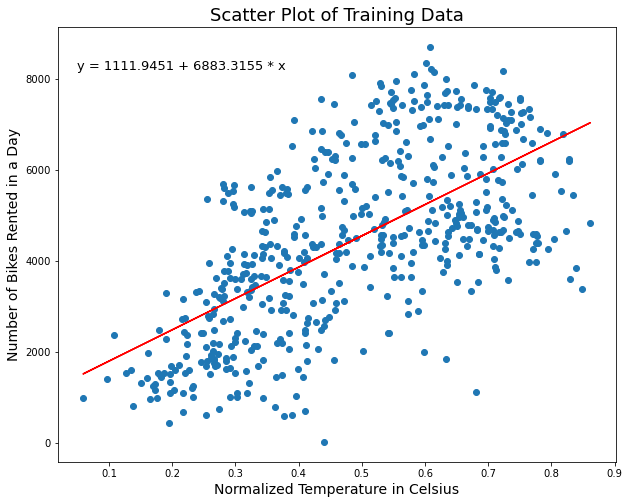

In [26]:
#plot the model using training data

plt.figure(figsize=(10,8))

plt.scatter(x_train, y_train)
plt.plot(x_train, 1111.9451 + 6883.3155*x_train, 'r')

plt.ylabel('Number of Bikes Rented in a Day', fontsize=14)
plt.xlabel('Normalized Temperature in Celsius',  fontsize=14)
plt.text(0.05, 8200, 'y = 1111.9451 + 6883.3155 * x', size=13)
plt.title('Scatter Plot of Training Data', fontsize = 18)

plt.show()

The above scatter plot represents the a positive relationship between normalized temperature and the number of bikes rented in a day. The red line is the predicted relationship between the variables. Where  **intercept = 1111.9451** and **slope = 6883.3155**.

**Predicted number of bikes rented = 1111.9451 + 6883.3155 * normalized temperature in Celsius.**

Overall, the model suggests the number of bikes rented increase as the temperature increases. For each unit increase in normalized temperature the number of bikes rented in a day increases by about **6883**.

## Model Evaluation

In [27]:
#Add constant to test data

x_test_sm = sm.add_constant(x_test)

#Predict on test data

y_pred_test = lr.predict(x_test_sm)

#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

#Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

r2 = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test R-squared: {r2}")

Test MSE: 2328615.027113774
Test RMSE: 1525.980021859321
Test R-squared: 0.337603983267997


C:\Users\suren\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


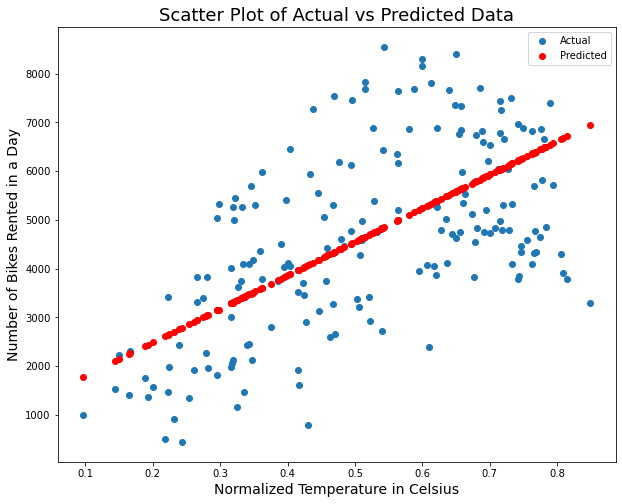

In [28]:
#Plot predictions on test data

plt.figure(figsize=(10,8))

plt.scatter(x_test, y_test, label='Actual')
plt.scatter(x_test, y_pred_test, color='red', label='Predicted')

plt.xlabel('Normalized Temperature in Celsius', fontsize=14)
plt.ylabel('Number of Bikes Rented in a Day', fontsize=14)
plt.legend()
plt.title('Scatter Plot of Actual vs Predicted Data', fontsize = 18)

plt.show()

### Residual Analysis

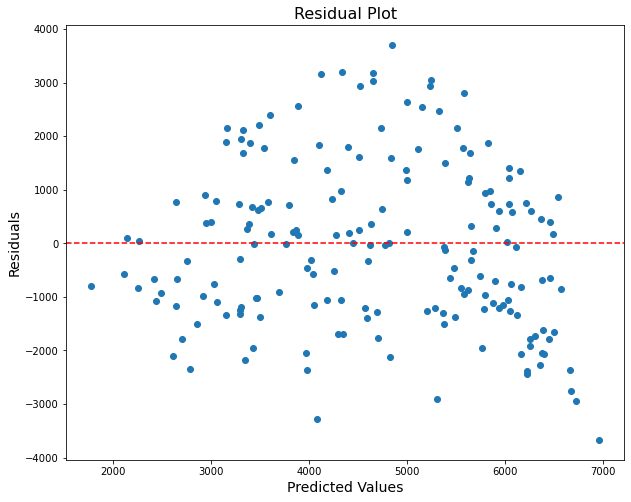

In [29]:
#Calculate residuals
res = (y_test - y_pred_test)

#Residual plot

plt.figure(figsize=(10,8))

plt.scatter(y_pred_test, res)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)

plt.show()

<Figure size 1080x576 with 0 Axes>

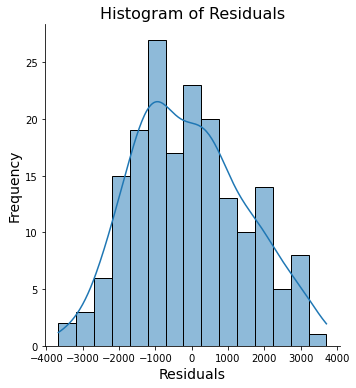

In [30]:
#Residual distribution

plt.figure(figsize=(15,8))

#plt.hist(res, bins=10, edgecolor='k',)

sns.displot(res, bins= 15, kde=True)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Residuals', fontsize=16)

plt.show()

From the histogram above, it can be interpreted that the residual curve almost follows a normal distribution.

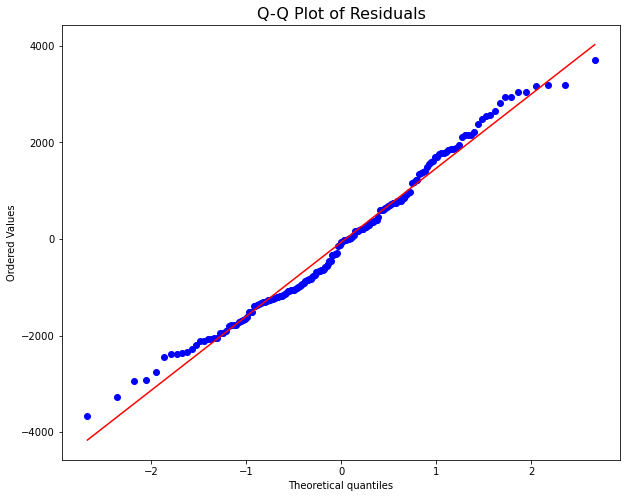

In [31]:
#Q-Q plot to check normality

import scipy.stats as stats

plt.figure(figsize=(10,8))

stats.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=16)

plt.show()

The Q-Q plot depicted above shows that most of the points closely fall on the straight diagonal line that suggests the residuals are normally distributed. 

## Conclusion

The analysis reveals a significant 65% increase in bike rentals from 2011 to 2012, suggesting growing popularity in bike-sharing services. The data further indicates that demand for bikes is strongly influenced by weather conditions, with rentals increasing as temperatures rise and on days with clearer skies. A simple linear regression model confirms that temperature is a key predictor of bike rentals, showing a positive correlation between higher temperatures and the number of bikes rented. This finding emphasizes the role of favorable weather in driving bike rental demand.